# Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [70]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [71]:
#checking shape of Data.
df.shape

(7043, 21)

In [72]:
#Checking Data Types.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [73]:
#Getting details from all features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Missing values are present.

In [75]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
gender,"[Female, Male]",2
SeniorCitizen,"[0, 1]",2
Partner,"[Yes, No]",2
Dependents,"[No, Yes]",2
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
PhoneService,"[No, Yes]",2
MultipleLines,"[No phone service, No, Yes]",3
InternetService,"[DSL, Fiber optic, No]",3
OnlineSecurity,"[No, Yes, No internet service]",3


Here, We are checking unique values of all features in Data and How many columns are categorical.

In [ ]:
#Droping column as we are getting it is not related with prediction.
df.drop(['customerID'],axis=1,inplace=True)

# Statistical Summary

In [77]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we are analysing the all numerical features statistically and as we are seeing here all numerical features describing with count,mean,std,minm,25%,50%, 75% and max.

# Data Visualization

<AxesSubplot:>

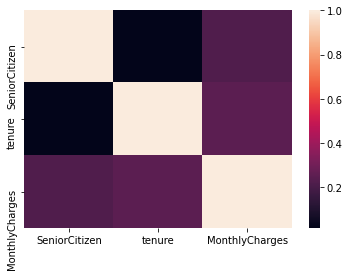

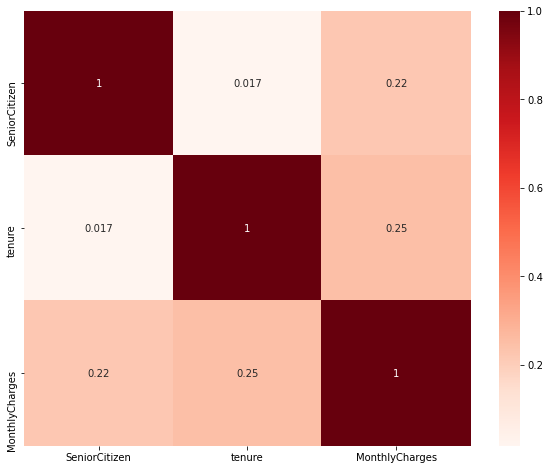

In [78]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='Reds',annot=True)

# Univariate Analysis

Text(0.5, 1.0, 'gender')

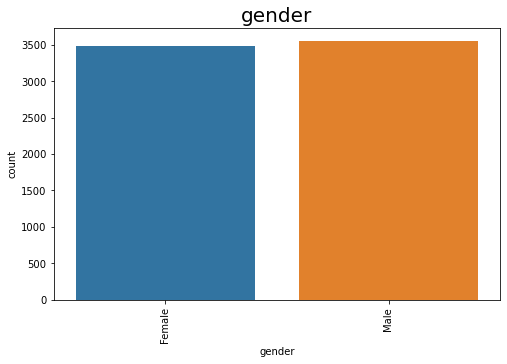

In [80]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="gender")
plt.xticks(rotation=90)
plt.title("gender", fontsize = 20)

Here we are ploting Gender column and as we getting male and female both are equal.

Text(0.5, 1.0, 'SeniorCitizen')

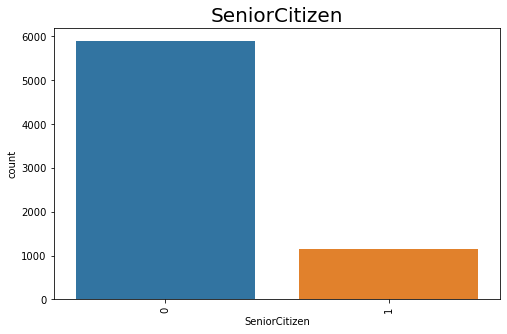

In [81]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="SeniorCitizen")
plt.xticks(rotation=90)
plt.title("SeniorCitizen", fontsize = 20)

Here 0 is very high then 1

Text(0.5, 1.0, 'Partner')

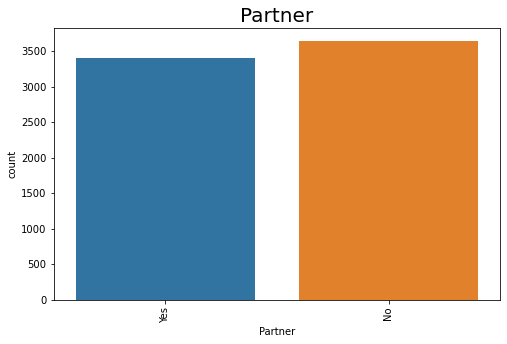

In [82]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Partner")
plt.xticks(rotation=90)
plt.title("Partner", fontsize = 20)

Both are almost equal Yes and No.

Text(0.5, 1.0, 'Dependents')

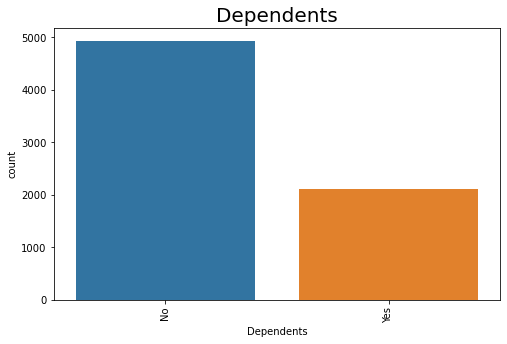

In [83]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Dependents")
plt.xticks(rotation=90)
plt.title("Dependents", fontsize = 20)

the maximum have no dependents.

Text(0.5, 1.0, 'tenure')

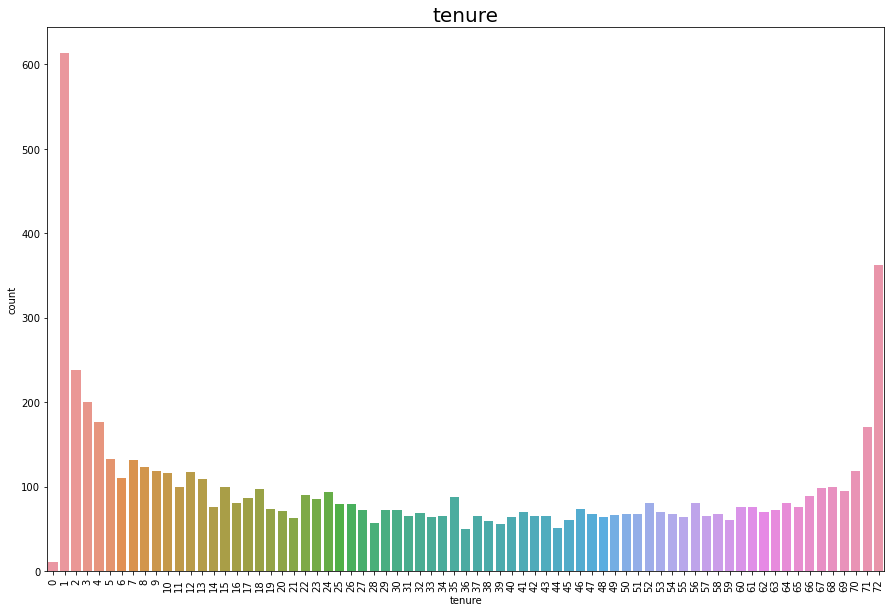

In [84]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="tenure")
plt.xticks(rotation=90)
plt.title("tenure", fontsize = 20)

The 1 and 2 no. are highest counts 

Text(0.5, 1.0, 'PhoneService')

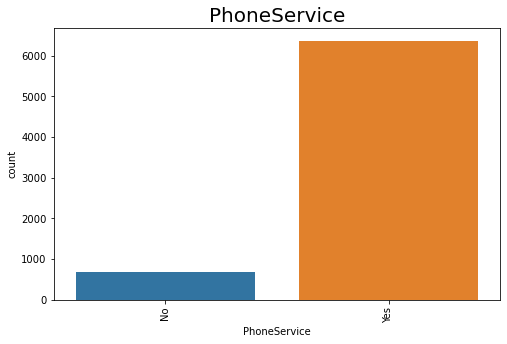

In [85]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="PhoneService")
plt.xticks(rotation=90)
plt.title("PhoneService", fontsize = 20)

very few who's have no phone service.

Text(0.5, 1.0, 'MultipleLines')

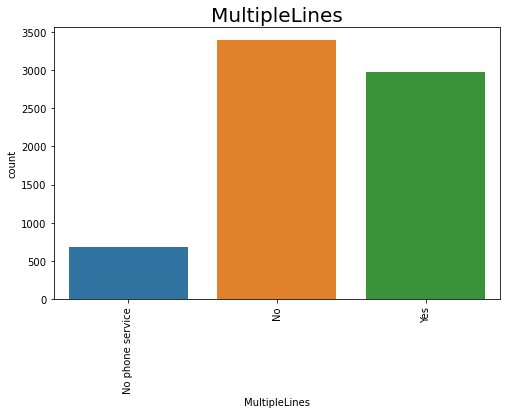

In [86]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="MultipleLines")
plt.xticks(rotation=90)
plt.title("MultipleLines", fontsize = 20)

If we check according to Multiplelines, Maximum have No multiplelines.

Text(0.5, 1.0, 'InternetService')

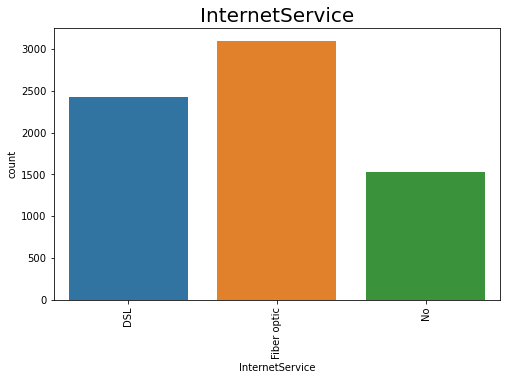

In [87]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="InternetService")
plt.xticks(rotation=90)
plt.title("InternetService", fontsize = 20)

Maximum customer have Fiber optical

Text(0.5, 1.0, 'TechSupport')

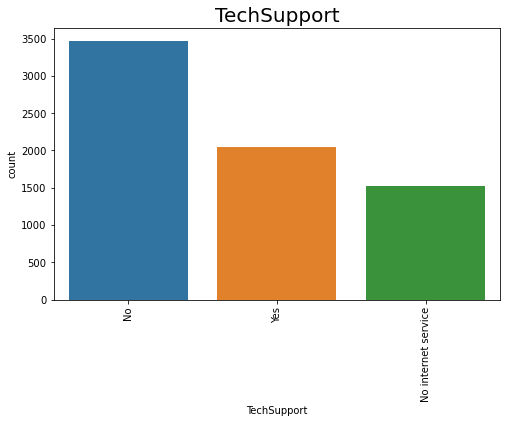

In [89]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="TechSupport")
plt.xticks(rotation=90)
plt.title("TechSupport", fontsize = 20)

Maximum customers have No Tech Support.

Text(0.5, 1.0, 'StreamingTV')

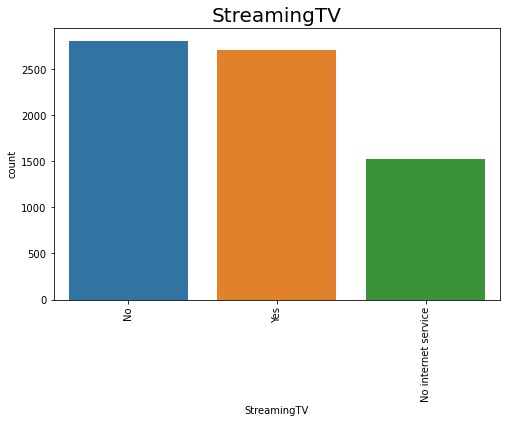

In [90]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="StreamingTV")
plt.xticks(rotation=90)
plt.title("StreamingTV", fontsize = 20)

According to Streaming TV, both are equal who's streaming TV or not streaming TV.

Text(0.5, 1.0, 'StreamingMovies')

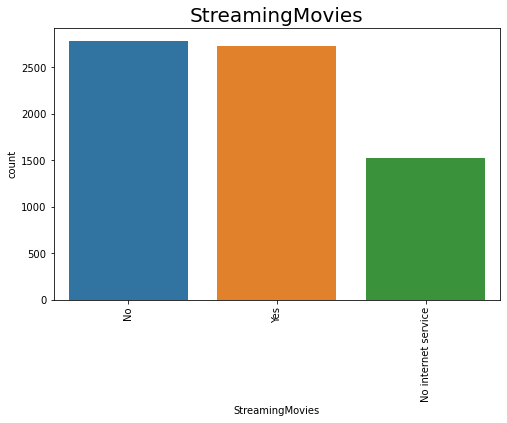

In [91]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="StreamingMovies")
plt.xticks(rotation=90)
plt.title("StreamingMovies", fontsize = 20)

According to Streaming Movies, both are equal who's streaming Movies or not streaming Movies. Few customers have no internet servie.

Text(0.5, 1.0, 'Contract')

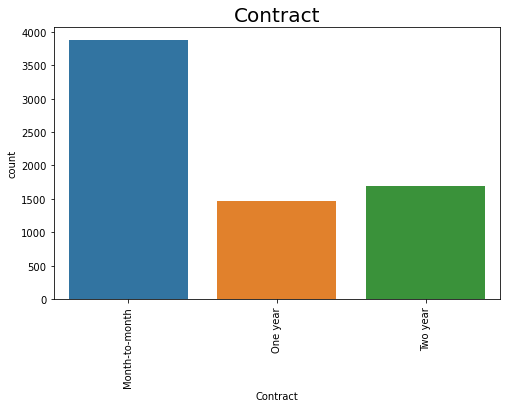

In [92]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Contract")
plt.xticks(rotation=90)
plt.title("Contract", fontsize = 20)

The maximum customers are month to month contract cusotmers.

Text(0.5, 1.0, 'PaymentMethod')

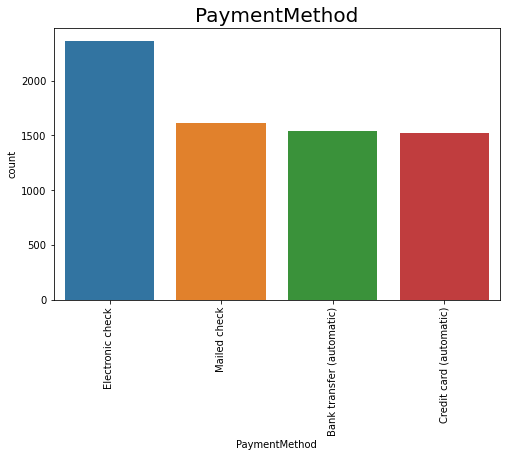

In [93]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="PaymentMethod")
plt.xticks(rotation=90)
plt.title("PaymentMethod", fontsize = 20)

The maximum customers paymentmethod are Electronic check.

Text(0.5, 1.0, 'Churn')

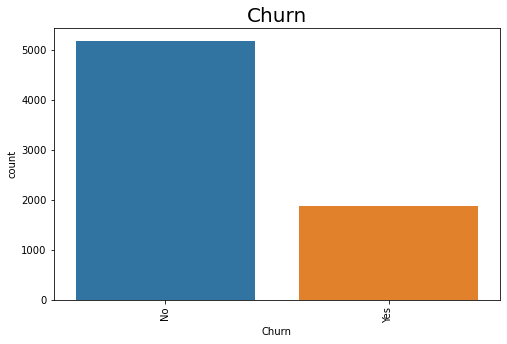

In [94]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Churn")
plt.xticks(rotation=90)
plt.title("Churn", fontsize = 20)

According to target variable maximum customers no churn.

# Bivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

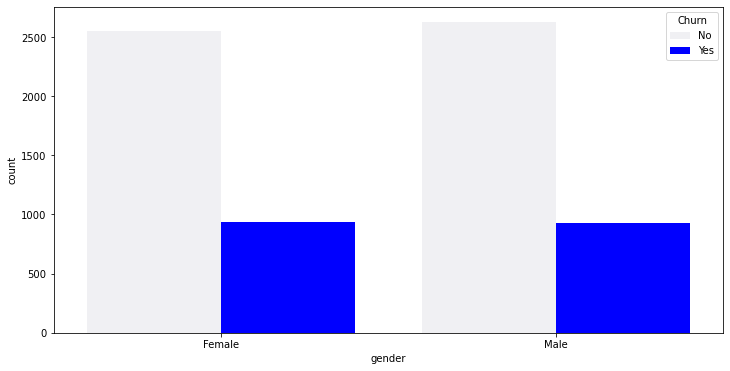

In [96]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'gender' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

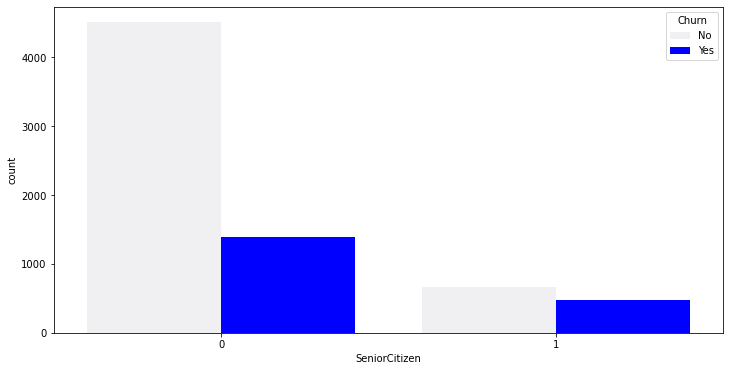

In [97]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'SeniorCitizen' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

It can be observed that the fraction of senior citizen is very less and Most of the senior citizens churn.

<AxesSubplot:xlabel='Partner', ylabel='count'>

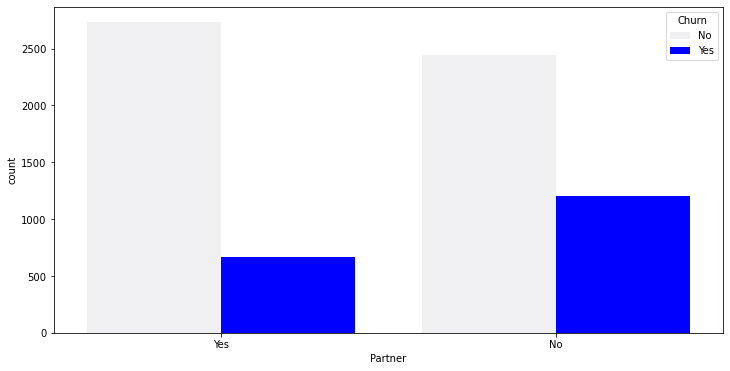

In [98]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Partner' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Customers that doesn't have partners are more likely to churn.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

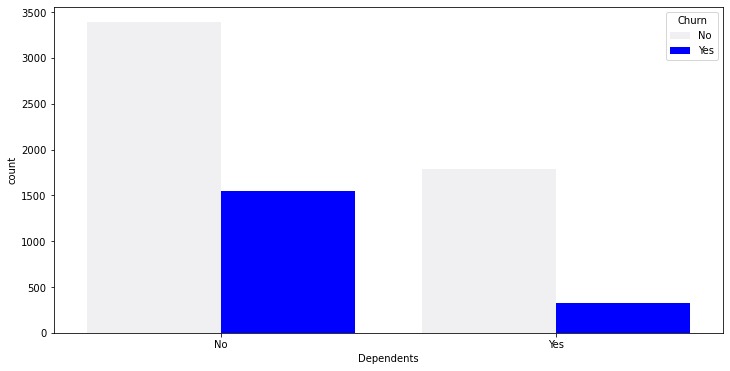

In [99]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

according to dependent NO is higher then Yes churn.

<AxesSubplot:xlabel='tenure', ylabel='count'>

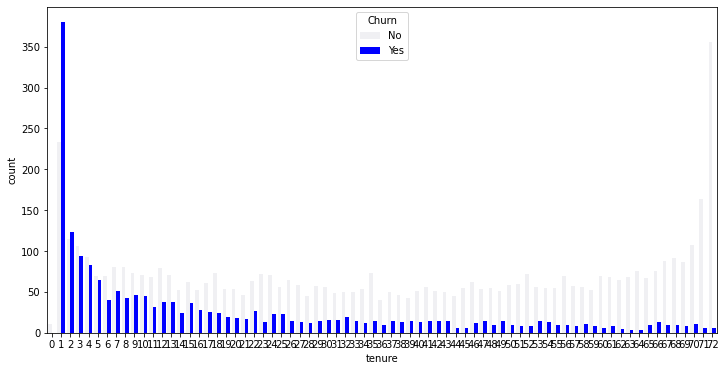

In [100]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'tenure' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

New customers are more likely to churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

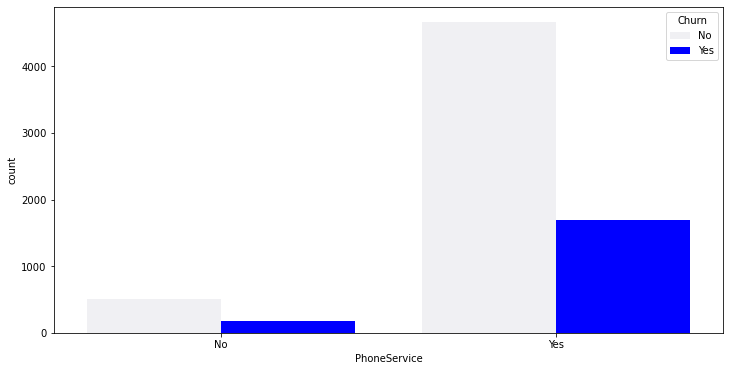

In [102]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'PhoneService' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

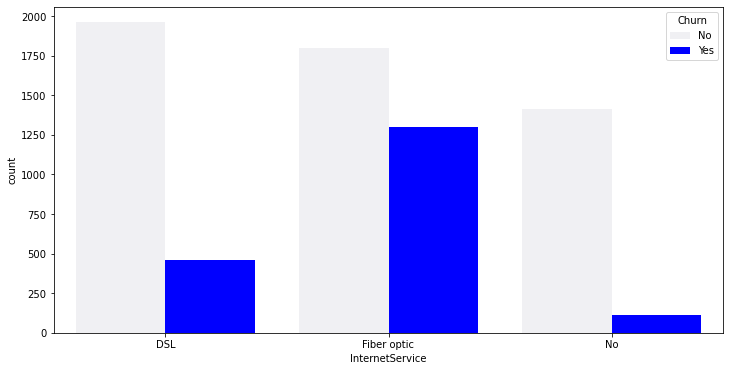

In [104]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'InternetService' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Fiber optic has highest churn others are less.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

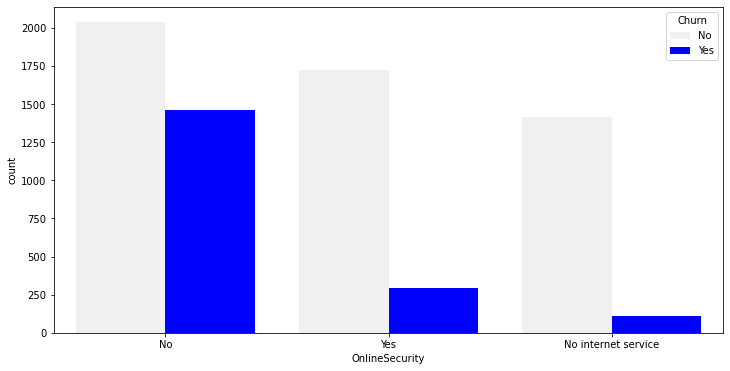

In [105]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'OnlineSecurity' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Most customers churn in the absence of online security,

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

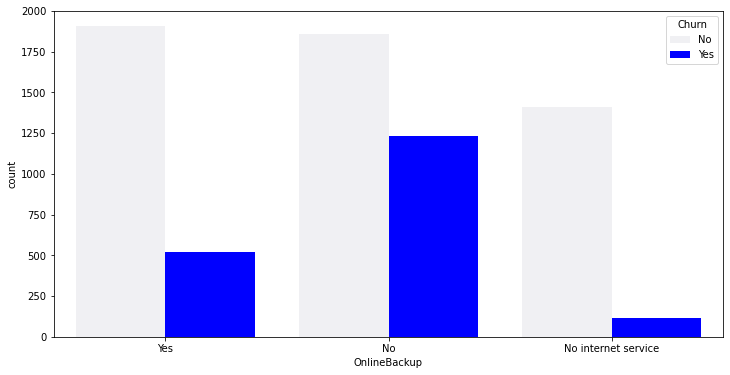

In [106]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'OnlineBackup' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

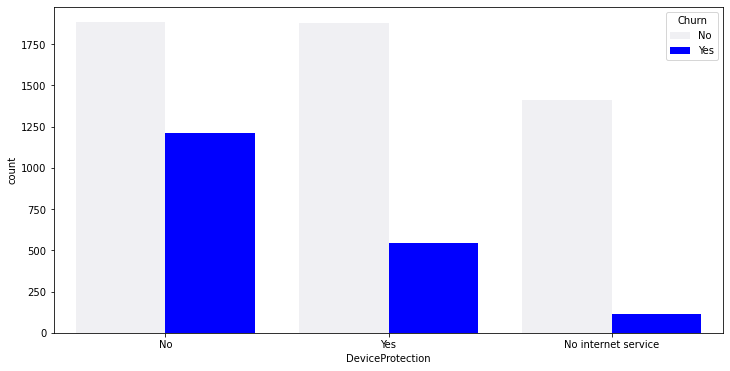

In [107]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'DeviceProtection' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

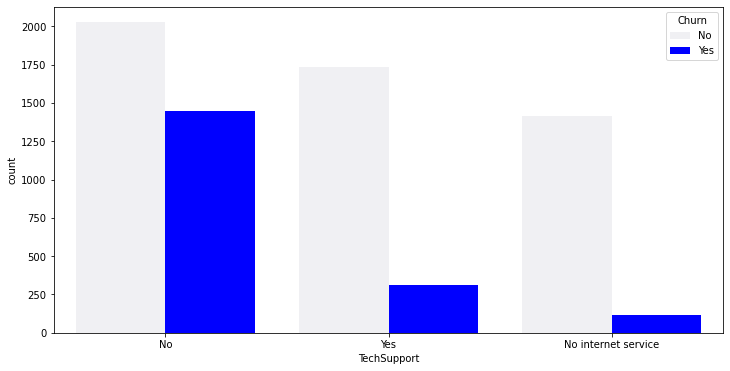

In [108]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'TechSupport' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Customers with no TechSupport are most likely to migrate to another service provider.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

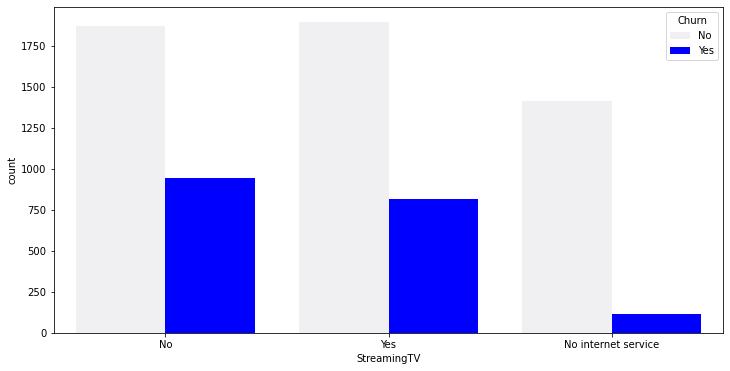

In [109]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'StreamingTV' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

According to above Highest churn are not streaming TV.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

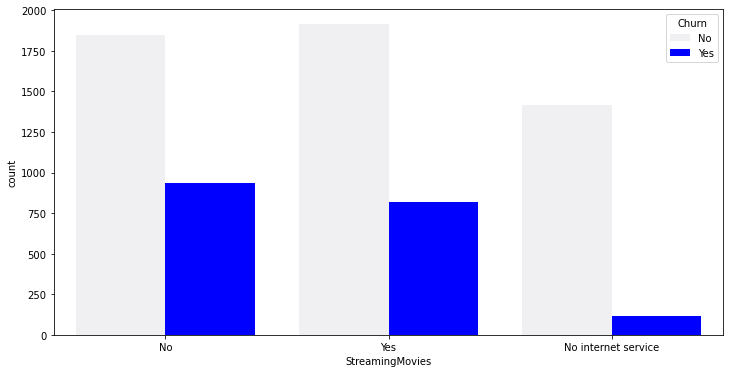

In [110]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'StreamingMovies' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

According to above Highest churn are not streaming Movies.

<AxesSubplot:xlabel='Contract', ylabel='count'>

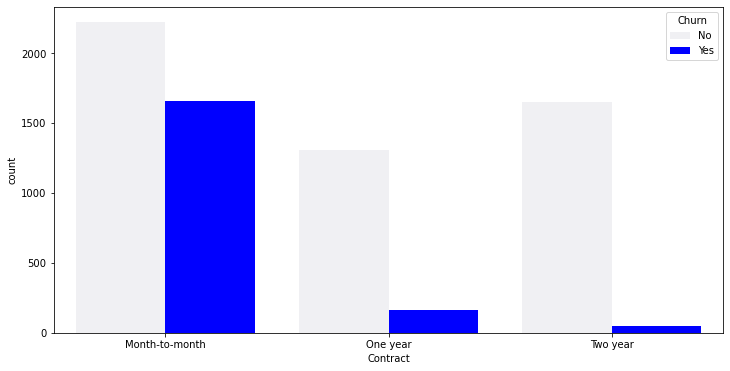

In [111]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Contract' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Highest churn have month_to_month contract.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

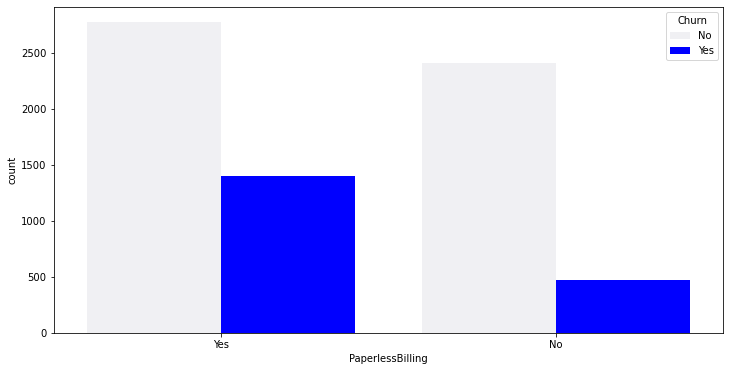

In [112]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaperlessBilling' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Customers with Paperless Billing are most likely to churn.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

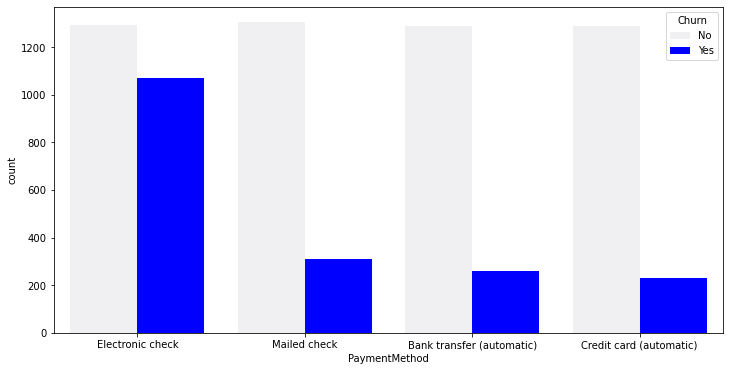

In [113]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaymentMethod' , hue = 'Churn' , data = df , dodge = True , color = 'Blue' , saturation = 1)

Electronic Check is the highest to churn.

In [115]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
#replacing target variable into 0 and 1
df['Churn'] = df['Churn'].str.replace('No', '0')
df['Churn'] = df['Churn'].str.replace('Yes', '1')
df['Churn'] = df['Churn'].astype(np.int64)

# Data Encoding

In [118]:
from sklearn.preprocessing import LabelEncoder
encoded = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

encoders = {column: LabelEncoder() for column in encoded}

for column in encoded:
    df[column] = encoders[column].fit_transform(df[column])

In [119]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Removing Missing or NaN values.

In [120]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [121]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [122]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,NaN,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,NaN,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,NaN,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,NaN,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,NaN,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,NaN,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,NaN,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,NaN,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,NaN,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,NaN,0


In [123]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [124]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [125]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [126]:
df['Churn'] = pd.to_numeric(df.Churn, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [127]:
df[np.isnan(df['Churn'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [128]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [129]:
df = df.fillna(df['Churn'].value_counts().index[0])

In [130]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# Checking Outliers

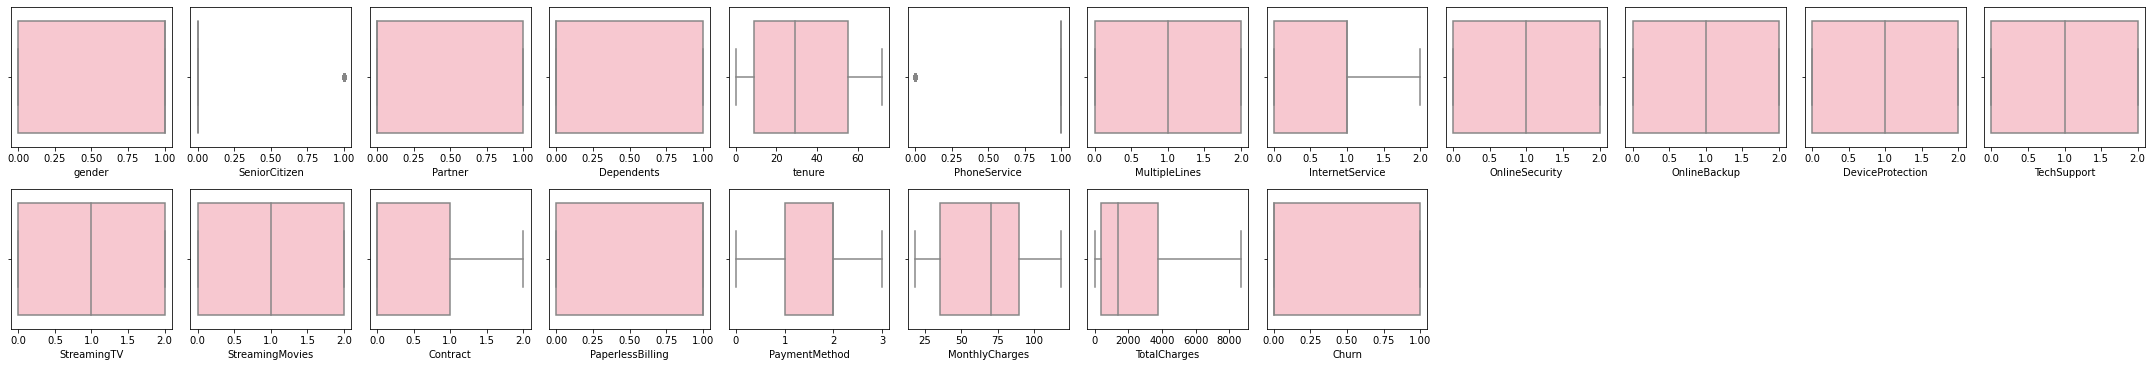

In [131]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(30,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Pink', orient='v')
    plt.tight_layout()

There are no outliers and as we are getting few are present but it is not affecting the data.

# Spliting the Independent and Target Variables.

In [132]:
x=df.drop('Churn',axis=1)
y=df['Churn']

# Data Scaling

In [133]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.003437
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.217564
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.012453
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.211951
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.229194
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847792
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.039892
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.035303


# Data Imbalance

Text(0.5, 1.0, 'Target Variable')

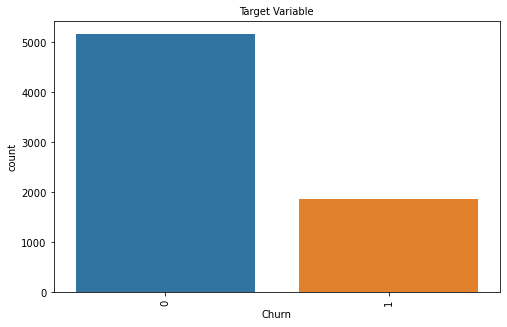

In [134]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="Churn")
plt.xticks(rotation=90)
plt.title("Target Variable", fontsize = 10)

In [135]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(X,y)

In [136]:
y_over=pd.DataFrame(y_over)

In [137]:
X=x_over
y=y_over

In [138]:
print(X.shape,y.shape)

(10348, 19) (10348, 1)


# Finding best Random State for train test split.

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    pred = lg.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 132, 79.22705314009661


In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=132)

# Importing Algorithms

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# LogisticRegression

In [142]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.7922705314009661
[[1170  381]
 [ 264 1290]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1551
           1       0.77      0.83      0.80      1554

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# RandomForestClassifier

In [143]:
rf=RandomForestClassifier(n_estimators=100,random_state=49)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8582930756843801
[[1315  236]
 [ 204 1350]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1551
           1       0.85      0.87      0.86      1554

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



# DecisionTreeClassifier

In [144]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7932367149758454
[[1240  311]
 [ 331 1223]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1551
           1       0.80      0.79      0.79      1554

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



# AdaBoostClassifier

In [145]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.826731078904992
[[1229  322]
 [ 216 1338]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1551
           1       0.81      0.86      0.83      1554

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



# MultinomialNB

In [146]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train) 
pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,pred_mnb))
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

0.7584541062801933
[[1131  420]
 [ 330 1224]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1551
           1       0.74      0.79      0.77      1554

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



# KNeighborsClassifier

In [147]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.777133655394525
[[1038  513]
 [ 179 1375]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1551
           1       0.73      0.88      0.80      1554

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.77      3105
weighted avg       0.79      0.78      0.77      3105



# Spport Vector Classifier

In [148]:
svc=SVC()
svc.fit(X_train,y_train) 
pred_svc=svc.predict(X_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8173913043478261
[[1209  342]
 [ 225 1329]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1551
           1       0.80      0.86      0.82      1554

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



# Cross Validation

As we know the Random Forest Classifier is given hight score but we are Cross validating the models to see thre are underfitting or overfitting present or not.

In [149]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, X, y, cv = 5)
print(lg_scores)
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

rf_scores = cross_val_score(rf, X, y, cv = 5)
print(rf_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rf_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, X, y, cv = 5)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

ad_scores = cross_val_score(ad, X, y, cv = 5)
print(ad_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ad_scores.mean()*100}\n")

mnb_scores = cross_val_score(mnb, X, y, cv = 5)
print(mnb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {mnb_scores.mean()*100}\n")

knn_scores = cross_val_score(knn, X, y, cv = 5)
print(knn_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knn_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, X, y, cv = 5)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

[0.77294686 0.76280193 0.76811594 0.78347028 0.79023683]
Mean of accuracy scores is for Logistic Regression is 77.55143678362204

[0.77101449 0.79130435 0.88115942 0.89415176 0.90865152]
Mean of accuracy scores is for Random Forest Classifier is 84.92563094962911

[0.71062802 0.72222222 0.83478261 0.81971967 0.83470275]
Mean of accuracy scores is for Decision Tree Classifier is 78.44110553068882

[0.77004831 0.7705314  0.82028986 0.84920251 0.84871919]
Mean of accuracy scores is for ADA Boost Classifier is 81.17582533044738

[0.75797101 0.74347826 0.73961353 0.76848719 0.76655389]
Mean of accuracy scores is for MultinomialNB is 75.5220776916198

[0.76811594 0.77342995 0.79903382 0.78540358 0.79700338]
Mean of accuracy scores is for KNN Classifier is 78.45973340057859

[0.77777778 0.77149758 0.81352657 0.82358627 0.83566941]
Mean of accuracy scores is for SVC Classifier is 80.44115222878331



# Hyper parameter tuning

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
rf = RandomForestClassifier()
grid_parameters = dict()
grid_parameters['criterion'] = ['gini', 'entropy']
grid_parameters['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
grid_parameters['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]
grid_sr = GridSearchCV(estimator=rf,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_parameters)
print(best_result)
print(best_model)

{'criterion': 'entropy', 'min_samples_split': 5, 'n_estimators': 200}
0.8403972638779269
RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200)


In [152]:
RF = RandomForestClassifier(criterion = 'entropy', min_samples_split = 5, n_estimators = 100)
RF.fit(X_train, y_train)
print(RF.score(X_train, y_train))
pred_rf = RF.predict(X_test)

0.9797045423167196


# Model Evaluation

# Metrics

In [153]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [154]:
#Import ROC_AUC_SCORE.
from sklearn.metrics import roc_auc_score

In [155]:
y_pred_prob=RF.predict_proba(X_test)[:,1]
y_pred_prob

array([0.84928571, 0.904     , 0.46088095, ..., 0.11719048, 0.86625   ,
       0.89286905])

In [156]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [157]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.44745326e-04,
       6.44745326e-04, 6.44745326e-04, 6.44745326e-04, 6.44745326e-04,
       6.44745326e-04, 6.44745326e-04, 6.44745326e-04, 6.44745326e-04,
       6.44745326e-04, 6.44745326e-04, 6.44745326e-04, 6.44745326e-04,
       6.44745326e-04, 6.44745326e-04, 6.44745326e-04, 1.28949065e-03,
       1.28949065e-03, 1.28949065e-03, 1.28949065e-03, 1.93423598e-03,
      

In [158]:
tpr

array([0.        , 0.01480051, 0.01544402, 0.01673102, 0.01994852,
       0.02123552, 0.02316602, 0.02445302, 0.02509653, 0.02702703,
       0.02960103, 0.03088803, 0.03346203, 0.03474903, 0.03539254,
       0.03796654, 0.04697555, 0.04890605, 0.05019305, 0.05148005,
       0.05341055, 0.05598456, 0.05662806, 0.05791506, 0.06241956,
       0.06370656, 0.06563707, 0.06885457, 0.06949807, 0.07078507,
       0.07335907, 0.07464607, 0.07786358, 0.08043758, 0.08365508,
       0.08365508, 0.0965251 , 0.0978121 , 0.0984556 , 0.1010296 ,
       0.1048906 , 0.10617761, 0.10939511, 0.11068211, 0.11196911,
       0.11325611, 0.11711712, 0.11840412, 0.12419562, 0.12548263,
       0.13127413, 0.13127413, 0.13577864, 0.13835264, 0.13963964,
       0.13963964, 0.14221364, 0.14350064, 0.15057915, 0.15186615,
       0.17503218, 0.17631918, 0.17631918, 0.22007722, 0.22136422,
       0.23101673, 0.23230373, 0.24324324, 0.24453024, 0.24646075,
       0.24646075, 0.27027027, 0.27027027, 0.27155727, 0.27155

In [159]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98571429e-01, 9.98333333e-01,
       9.97500000e-01, 9.97142857e-01, 9.94920635e-01, 9.94666667e-01,
       9.94333333e-01, 9.94000000e-01, 9.93333333e-01, 9.93000000e-01,
       9.92920635e-01, 9.92500000e-01, 9.92142857e-01, 9.91666667e-01,
       9.88571429e-01, 9.88000000e-01, 9.87416667e-01, 9.87250000e-01,
       9.86952381e-01, 9.86333333e-01, 9.86250000e-01, 9.86000000e-01,
       9.83833333e-01, 9.83500000e-01, 9.83095238e-01, 9.82833333e-01,
       9.82777778e-01, 9.82500000e-01, 9.81333333e-01, 9.81333333e-01,
       9.80357143e-01, 9.80000000e-01, 9.78500000e-01, 9.78333333e-01,
       9.73214286e-01, 9.72916667e-01, 9.72750000e-01, 9.72000000e-01,
       9.71238095e-01, 9.71166667e-01, 9.70500000e-01, 9.70359307e-01,
       9.70166667e-01, 9.70000000e-01, 9.67666667e-01, 9.67619048e-01,
       9.65702381e-01, 9.65000000e-01, 9.62202381e-01, 9.61666667e-01,
       9.60777778e-01, 9.60000000e-01, 9.59333333e-01, 9.58654762e-01,
      

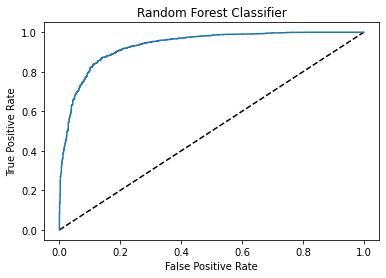

In [160]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [161]:
auc_score=roc_auc_score(y_test,RF.predict(X_test))
print(auc_score)

0.8615004891600635


In [162]:
from sklearn import metrics

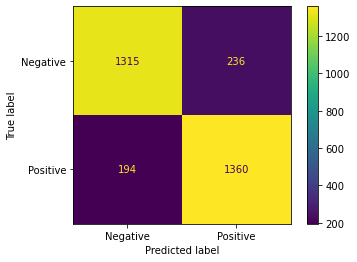

In [163]:
metrics.plot_confusion_matrix(RF, X_test, y_test, display_labels=['Negative', 'Positive'])

# Saving Model

In [164]:
import joblib
joblib.dump(RF,'Customer_Churn_Prediction.obj')

['Customer_Churn_Prediction.obj']